In [26]:
from datetime import datetime, timedelta
from apiclient.discovery import build
import matplotlib.pyplot as plt


In [28]:
api_key = "^^^^^^^^^^^^^^^^^^^^^^^^" #generated from credentials in console.developers.com
youtube = build('youtube', 'v3', developerKey=api_key)

In [30]:
#python code to get all videos titles of specific channel
def videos_of_given_channel_id(channel_id):
    
    youtube_videos = youtube.channels().list(id=channel_id, part='contentDetails').execute()
    playlist_id = youtube_videos['items'][0]['contentDetails']['relatedPlaylists']['uploads']
    
    videos = []
    next_page_token = None
    while True:
        results = youtube.playlistItems().list(playlistId=playlist_id, part='snippet', maxResults=20, pageToken=next_page_token).execute()
        videos += results['items']
        next_page_token = results.get('nextPageToken')

        if next_page_token is None:
            break
    
    return videos
videos = videos_of_given_channel_id('UCvEKHATlVq84hm1jduTYm8g')

for each_video in range(len(videos)):
  print( str(each_video+1) + ": " + str(videos[each_video]["snippet"]["title"]))


1: Pros/Cons of International Placements | Downsides of 1/2 CR Packages - MUST WATCH
2: Team Outing - Zakopane - The View from Cable Car 😍
3: Curated Resources for Advanced DSA - MAANG or PBC Interviews
4: Tromso, Norway | Northern Lights? | Check Description |  Heaven on Earth?
5: Celebrated Diwali in Google Warsaw Office - Vlog
6: Our Second Silver Play Button is here ♥️
7: WE HEARD YOU - STRIVER's A2Z DSA Course/Sheet Massive Feature Update!
8: Strivers A2Z DSA Course/Sheet - The Biggest Launch from TUF 🔥
9: Ace CP using Codeforces | Ft . AIR 1 Google Kickstart | 100% Placement Opportunities
10: 1000 Rs ka Unique Ice Cream 🤣 and 753474 sq.ft third largest CASTLE in the World | Prague, Czech
11: A TRIP TO HEL*, GDANSK, GDYNIA | DRONE + CINEMATIC Shots
12: MY NEW APARTMENT TOUR IN WARSAW | SHIFTING VLOG
13: Bio Student, Tier 3, Infosys to FAANG, Juspay and Publicis | Inspiring Journey
14: A Weekend In Warsaw Poland | Drone Shots 🔥 | Engineer's Life ❤️
15: Why is GFG not Funded Yet? Pr

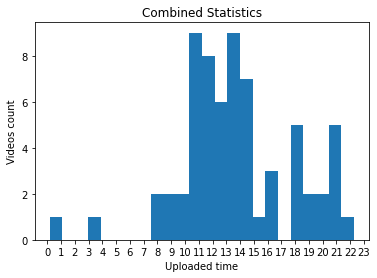

In [27]:
#Histogram plot for time to the count of videos uploadment
def channel_id(name):
    return youtube.search().list(q=name, type='channel', part='id,snippet').execute()['items'][0]

def timestamp(video):
    return (datetime.strptime(video['snippet']['publishedAt'], "%Y-%m-%dT%H:%M:%SZ") + timedelta(hours=5, minutes=30))

channel_id = channel_id('Striver')['id']['channelId']
videos = videos_of_given_channel_id(channel_id)
timestamps = [timestamp(each_video) for each_video in videos]
publish_times = [t.hour + t.minute/60 for t in timestamps]
plt.hist(publish_times, bins=24)
plt.title("Combined Statistics")
plt.xlabel("Uploaded time")
plt.ylabel("Videos count")

plt.xticks(range(24))
plt.show()
